### 1. Import and data loading

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chess

In [2]:
# Load data
df = pd.read_csv("data/chess_games_raw.csv")
df

/tmp/ipykernel_201098/2651139906.py:2: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/chess_games_raw.csv")


,Event,Site,Date,Round,White,Black,Result,ECO,WhiteElo,BlackElo,PlyCount,EventDate,EventType,Termination,Moves
0,Rated Blitz game,lichess.org,2024.01.01,?,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,49.0,2024.??.??,blitz,Time forfeit,c4 c6 g3 d5 Nf3 Nf6 Bg2 e6 b3 Be7 Bb2 O-O O-O ...
1,Rated Blitz game,lichess.org,2024.01.01,?,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,71.0,2024.??.??,blitz,Normal,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...
2,Rated Blitz game,lichess.org,2024.01.01,?,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,59.0,2024.??.??,blitz,Normal,d4 d5 c4 e6 Nc3 Nf6 cxd5 exd5 Bg5 c6 e3 h6 Bh4...
3,Rated Blitz game,lichess.org,2024.01.01,?,Chigorinez,Luhrman,1-0,B40,2542,2433,71.0,2024.??.??,blitz,Normal,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...
4,Rated Blitz game,lichess.org,2024.01.01,?,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,56.0,2024.??.??,blitz,Normal,e4 e5 Nf3 Nf6 Nc3 Nc6 Bb5 Nd4 Nxd4 exd4 Nd5 c6...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269261,Rated Blitz game,?,2024.12.31,-,AfricanJo,Yuri_Guenther,1/2-1/2,C47,2665,2655,NaN,NaN,NaN,Normal,e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bx...
3269262,Rated Blitz game,?,2024.12.31,-,cad2024,emiliofelixramirez,1-0,D23,2537,2449,NaN,NaN,NaN,Time forfeit,d4 d5 c4 dxc4 Nf3 Nf6 g3 Nc6 Bg2 Be6 O-O h6 Nc...
3269263,Rated Blitz game,?,2024.12.31,-,learningchessreally,BiletskiyDanylo,0-1,A15,2583,2557,NaN,NaN,NaN,Time forfeit,Nf3 Nf6 c4 e6 Nc3 Be7 e4 O-O d4 c5 d5 exd5 cxd...
3269264,Rated Blitz game,?,2024.12.31,-,lotrisking,ezis71,1-0,D30,2513,2398,NaN,NaN,NaN,Normal,d4 d5 c4 e6 Nf3 a6 g3 dxc4 Bg2 b5 O-O Bb7 a4 N...


### 2. Initial data exploration 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269266 entries, 0 to 3269265
Data columns (total 15 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Event        object 
 1   Site         object 
 2   Date         object 
 3   Round        object 
 4   White        object 
 5   Black        object 
 6   Result       object 
 7   ECO          object 
 8   WhiteElo     int64  
 9   BlackElo     int64  
 10  PlyCount     float64
 11  EventDate    object 
 12  EventType    object 
 13  Termination  object 
 14  Moves        object 
dtypes: float64(1), int64(2), object(12)
memory usage: 374.1+ MB


In [4]:
df.isnull().sum()

Event                0
Site                 0
Date                 0
Round                0
White                0
Black                0
Result               0
ECO                336
WhiteElo             0
BlackElo             0
PlyCount       2707355
EventDate      2707355
EventType      2711070
Termination          0
Moves             1010
dtype: int64

In [5]:
df.describe()

,WhiteElo,BlackElo,PlyCount
count,3.269266e+06,3.269266e+06,561911.000000
mean,2.569311e+03,2.568953e+03,87.919028
std,1.342731e+02,1.328460e+02,40.879115
min,2.300000e+03,2.300000e+03,0.000000
25%,2.500000e+03,2.500000e+03,60.000000
50%,2.545000e+03,2.545000e+03,81.000000
75%,2.620000e+03,2.620000e+03,110.000000
max,3.367000e+03,3.390000e+03,600.000000


In [6]:
df['Date'].value_counts()

Date
2024.12.28    13967
2024.05.11    11704
2024.02.10    11302
2024.01.22    10984
2024.01.13    10935
              ...  
2024.06.22     7495
2024.08.24     7342
2024.08.03     7209
2024.10.26     7143
2024.09.12     4500
Name: count, Length: 366, dtype: int64

### 3. Drop columns that has many missing data or irrelevant

In [7]:
df = df.drop(['Site', 'Round', 'PlyCount', 'EventDate'], axis=1)
df = df.dropna(subset=['ECO', 'Moves'])
df.isnull().sum()

Event                0
Date                 0
White                0
Black                0
Result               0
ECO                  0
WhiteElo             0
BlackElo             0
EventType      2710396
Termination          0
Moves                0
dtype: int64

### 4. Convert data types

In [8]:
df['WhiteElo'] = df['WhiteElo'].astype(int)
df['BlackElo'] = df['BlackElo'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3268256 entries, 0 to 3269265
Data columns (total 11 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Event        object
 1   Date         object
 2   White        object
 3   Black        object
 4   Result       object
 5   ECO          object
 6   WhiteElo     int64 
 7   BlackElo     int64 
 8   EventType    object
 9   Termination  object
 10  Moves        object
dtypes: int64(2), object(9)
memory usage: 299.2+ MB


### 5. Remove * or unfinished games rows 

In [9]:
df = df[df['Result'].isin(['1-0', '0-1', '1/2-1/2'])]
df['Result'].value_counts()

Result
1-0        1508074
0-1        1338304
1/2-1/2     421755
Name: count, dtype: int64


GAME LENGTH ANALYSIS (ALL GAMES)
Total games: 3,268,133

Move count statistics:
  Mean: 87.5 half-moves
  Median: 81 half-moves
  Min: 1
  Max: 601

Games by move count:
  ≤20 moves (opening):    27,370 (  0.8%)
  21-40 moves (early):   227,627 (  7.0%)
  41-60 moves (mid):     612,500 ( 18.7%)
  61-80 moves (late):    747,638 ( 22.9%)
  81+ moves (endgame):  1,652,998 ( 50.6%)


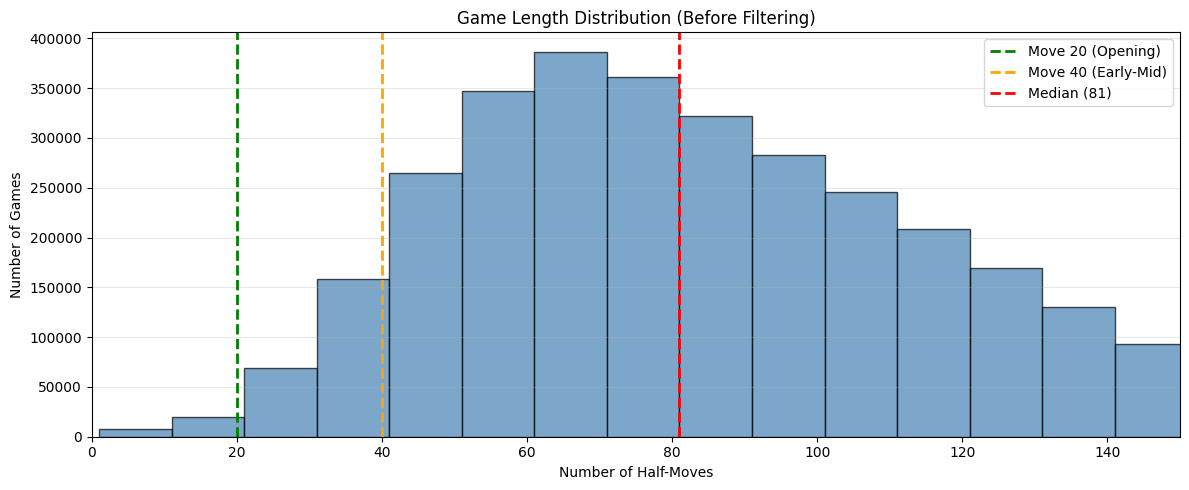

In [ ]:
df['NumMoves'] = df['Moves'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

print(f"\nMove count statistics:")
print(f"  Mean: {df['NumMoves'].mean():.1f} half-moves")
print(f"  Median: {df['NumMoves'].median():.0f} half-moves")
print(f"  Min: {df['NumMoves'].min()}")
print(f"  Max: {df['NumMoves'].max()}")

print(f"\nGames by move count:")
print(f"  ≤20 moves (opening):  {(df['NumMoves']<=20).sum():>8,} ({(df['NumMoves']<=20).mean()*100:>5.1f}%)")
print(f"  21-40 moves (early):  {((df['NumMoves']>20) & (df['NumMoves']<=40)).sum():>8,} ({((df['NumMoves']>20) & (df['NumMoves']<=40)).mean()*100:>5.1f}%)")
print(f"  41-60 moves (mid):    {((df['NumMoves']>40) & (df['NumMoves']<=60)).sum():>8,} ({((df['NumMoves']>40) & (df['NumMoves']<=60)).mean()*100:>5.1f}%)")
print(f"  61-80 moves (late):   {((df['NumMoves']>60) & (df['NumMoves']<=80)).sum():>8,} ({((df['NumMoves']>60) & (df['NumMoves']<=80)).mean()*100:>5.1f}%)")
print(f"  81+ moves (endgame):  {(df['NumMoves']>80).sum():>8,} ({(df['NumMoves']>80).mean()*100:>5.1f}%)")

# Visualization
plt.figure(figsize=(12, 5))
plt.hist(df['NumMoves'], bins=60, color='steelblue', edgecolor='black', alpha=0.7)
plt.axvline(20, color='green', linestyle='--', linewidth=2, label='Move 20 (Opening)')
plt.axvline(40, color='orange', linestyle='--', linewidth=2, label='Move 40 (Early-Mid)')
plt.axvline(df['NumMoves'].median(), color='red', linestyle='--', linewidth=2, 
            label=f"Median ({df['NumMoves'].median():.0f})")
plt.xlabel('Number of Half-Moves')
plt.ylabel('Number of Games')
plt.title('Game Length Distribution (Before Filtering)')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.xlim(0, 150)
plt.tight_layout()
plt.show()

### 6. Extract first N moves

In [11]:
def extract_early_game_data(moves_str, num_half_moves=40):
    """
    Extract first N half-moves AND board state at that position
    """
    if pd.isna(moves_str) or moves_str == '':
        return '', 0, None
    
    moves_list = str(moves_str).split()
    total_plies = len(moves_list)
    first_N = ' '.join(moves_list[:num_half_moves])
    
    # Play through first N moves and save board state
    board = chess.Board()
    for move_san in moves_list[:num_half_moves]:
        try:
            board.push_san(move_san)
        except:
            break
    
    # Save board as FEN 
    board_fen = board.fen() if total_plies >= num_half_moves else None
    
    return first_N, total_plies, board_fen

NUM_MOVES = 40

df[['FirstNMoves', 'TotalPlies', 'BoardStateAtMoveN']] = df['Moves'].apply(
    lambda x: pd.Series(extract_early_game_data(x, NUM_MOVES))
)

In [12]:
games_before = len(df)
df = df[df['TotalPlies'] >= NUM_MOVES]
games_after = len(df)
print(f"  Before: {games_before:,} games")
print(f"  After:  {games_after:,} games")
print(f"  Removed: {games_before - games_after:,} ({(games_before-games_after)/games_before*100:.1f}%)")

  Before: 3,268,133 games
  After:  3,031,415 games
  Removed: 236,718 (7.2%)


### 7. Parse and group game type into 3 categories

In [13]:
#df['Event'].unique()
df['Event'].value_counts()

Event
Rated Blitz game                                                  2678090
Rated Rapid game                                                   175362
Rated Classical game                                                15570
Rated Blitz tournament https://lichess.org/tournament/winter24       5069
Rated Blitz tournament https://lichess.org/tournament/spring24       3333
                                                                   ...   
Rated Rapid tournament https://lichess.org/tournament/o1dcM9hc          1
Rated Blitz tournament https://lichess.org/tournament/QScU2KZL          1
Rated Blitz tournament https://lichess.org/tournament/SZnNROls          1
Rated Blitz tournament https://lichess.org/tournament/9vPJJ4wJ          1
Rated Blitz tournament https://lichess.org/tournament/cIZ5FyHc          1
Name: count, Length: 8626, dtype: int64

In [14]:
def extract_time_class(event):
    event_lower = str(event).lower()
    if 'blitz' in event_lower:
        return 'blitz'
    elif 'rapid' in event_lower:
        return 'rapid'
    elif 'classical' in event_lower:
        return 'classical'
    else:
        return np.nan

df['EventType'] = df['Event'].apply(extract_time_class)
df = df[df['EventType'].notna()]
df['EventType'].value_counts(dropna=False)

EventType
blitz        2836706
rapid         179096
classical      15613
Name: count, dtype: int64

### 8. Drop duplicates 

In [15]:
df[df.duplicated()]

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,Termination,Moves,NumMoves,FirstNMoves,TotalPlies,BoardStateAtMoveN
8508,Rated Blitz game,2024.01.01,BOT-Feline,Fruity23,1/2-1/2,A28,2925,2922,blitz,Normal,c4 e5 Nc3 Nf6 Nf3 Nc6 e4 Bb4 d3 d6 a3 Bc5 b4 B...,57,c4 e5 Nc3 Nf6 Nf3 Nc6 e4 Bb4 d3 d6 a3 Bc5 b4 B...,57,r2q1rk1/1p3pp1/2pp4/pP5p/2PpP1n1/P1N3P1/4QP1P/...
79331,Rated Rapid game,2024.01.08,Mate-AI,Intron014,1/2-1/2,C67,2930,2945,rapid,Normal,e4 e5 Nf3 Nc6 Bb5 Nf6 O-O Nxe4 d4 Nd6 Bxc6 dxc...,69,e4 e5 Nf3 Nc6 Bb5 Nf6 O-O Nxe4 d4 Nd6 Bxc6 dxc...,69,k1b2b1r/2p1n1p1/1pp1Pp2/p6p/3N4/1PN4P/PBP2PP1/...
84624,Rated Rapid game,2024.01.09,caissa-x,FireFishBOT_v2,1/2-1/2,A01,2952,2950,rapid,Normal,b3 e5 Bb2 Nc6 c4 Nge7 Nf3 d5 cxd5 Nxd5 e4 Ndb4...,61,b3 e5 Bb2 Nc6 c4 Nge7 Nf3 d5 cxd5 Nxd5 e4 Ndb4...,61,r2r2k1/1pp1qppp/2n5/4P3/p2PP3/n4N2/4BP1P/2RQ1R...
156949,Rated Blitz game,2024.01.17,abcbot,blundar_bot,1/2-1/2,B90,2781,2855,blitz,Normal,e4 c5 Nf3 d6 Nc3 Nf6 d4 cxd4 Nxd4 a6 Bc4 e6 Be...,49,e4 c5 Nf3 d6 Nc3 Nf6 d4 cxd4 Nxd4 a6 Bc4 e6 Be...,49,1r3bk1/6pp/2npb3/p1nN4/4P1P1/1P2BP2/2P4P/3RK2R...
174641,Rated Blitz game,2024.01.18,blundar_bot,FelineBot,1/2-1/2,C89,2860,2947,blitz,Normal,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 O-O Be7 Re1 b5 Bb...,58,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 O-O Be7 Re1 b5 Bb...,58,r3r2k/6pp/p2b4/1p1p1p1q/3P1Pb1/2P1B1P1/PP1N3P/...
209229,Rated Blitz game,2024.01.22,caissa-ai,EdoBot,1/2-1/2,A01,2927,2929,blitz,Normal,b3 e5 Bb2 Nc6 c4 Nge7 Nf3 d5 cxd5 Nxd5 e4 Ndb4...,61,b3 e5 Bb2 Nc6 c4 Nge7 Nf3 d5 cxd5 Nxd5 e4 Ndb4...,61,r2r2k1/1pp1qppp/2n5/4P3/p2PP3/n4N2/4BP1P/2RQ1R...
209331,Rated Blitz game,2024.01.22,caissa-ai,EdoBot,1/2-1/2,A01,2927,2929,blitz,Normal,b3 e5 Bb2 Nc6 c4 Nge7 Nf3 d5 cxd5 Nxd5 e4 Ndb4...,61,b3 e5 Bb2 Nc6 c4 Nge7 Nf3 d5 cxd5 Nxd5 e4 Ndb4...,61,r2r2k1/1pp1qppp/2n5/4P3/p2PP3/n4N2/4BP1P/2RQ1R...
209401,Rated Blitz game,2024.01.22,caissa-ai,EdoBot,1/2-1/2,A01,2927,2929,blitz,Normal,b3 e5 Bb2 Nc6 c4 Nge7 Nf3 d5 cxd5 Nxd5 e4 Ndb4...,61,b3 e5 Bb2 Nc6 c4 Nge7 Nf3 d5 cxd5 Nxd5 e4 Ndb4...,61,r2r2k1/1pp1qppp/2n5/4P3/p2PP3/n4N2/4BP1P/2RQ1R...
457532,Rated Rapid game,2024.02.18,odonata-bot,jpg-bot,1/2-1/2,B90,2552,2300,rapid,Unknown,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 a6 Be3 e5 Nb...,50,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 a6 Be3 e5 Nb...,50,3qn1k1/3nb1pp/3p4/4p1P1/1p2P3/1P2B1N1/1P1Q3P/r...
649699,Rated Blitz game,2024.03.10,ProteusSF-Godot,EmptikBot,1/2-1/2,C52,2972,2976,blitz,Normal,e4 e5 Nf3 Nc6 Bc4 Bc5 b4 Bxb4 c3 Ba5 d4 d6 Qb3...,49,e4 e5 Nf3 Nc6 Bc4 Bc5 b4 Bxb4 c3 Ba5 d4 d6 Qb3...,49,r1b1r1k1/ppp2ppp/1b4n1/4P3/2qN4/2P5/P1QB1PPP/R...


In [16]:
df = df.drop_duplicates()

### 8. Drop columns not use as features

In [17]:
# Full move list and Total plies are for filtering
df = df.drop(['Moves', 'TotalPlies'], axis=1)
df

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,Termination,NumMoves,FirstNMoves,BoardStateAtMoveN
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,blitz,Time forfeit,49,c4 c6 g3 d5 Nf3 Nf6 Bg2 e6 b3 Be7 Bb2 O-O O-O ...,2rr2k1/p3bp1p/2n1bp2/q1pp4/N4Q1N/1P2P1P1/P4P1P...
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,Normal,71,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...,b5k1/4qppp/2p1p3/2P5/1p6/2n2NP1/2Q1PPBP/6K1 w ...
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,blitz,Normal,59,d4 d5 c4 e6 Nc3 Nf6 cxd5 exd5 Bg5 c6 e3 h6 Bh4...,2r1r1k1/p3qp2/1pp1bnp1/7p/1P1Pp3/P3P2P/1Q2NPP1...
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,Normal,71,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...,3rk2r/1b1pn1pp/p1nR4/4pPP1/Np2P3/4B3/PPP3BP/2K...
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,blitz,Normal,56,e4 e5 Nf3 Nf6 Nc3 Nc6 Bb5 Nd4 Nxd4 exd4 Nd5 c6...,r4rk1/ppb3p1/2p2pq1/8/3pp2Q/3P3R/PPP3PP/R1B3K1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269261,Rated Blitz game,2024.12.31,AfricanJo,Yuri_Guenther,1/2-1/2,C47,2665,2655,blitz,Normal,47,e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bx...,1r4k1/2p2p2/3b1p1p/r2p1B2/8/1P6/2P2PPP/3R1RK1 ...
3269262,Rated Blitz game,2024.12.31,cad2024,emiliofelixramirez,1-0,D23,2537,2449,blitz,Time forfeit,123,d4 d5 c4 dxc4 Nf3 Nf6 g3 Nc6 Bg2 Be6 O-O h6 Nc...,r4rk1/5pp1/p1qb1n1p/1p2pP2/P1p1P3/1nN1B1PP/RP2...
3269263,Rated Blitz game,2024.12.31,learningchessreally,BiletskiyDanylo,0-1,A15,2583,2557,blitz,Time forfeit,104,Nf3 Nf6 c4 e6 Nc3 Be7 e4 O-O d4 c5 d5 exd5 cxd...,2rq2k1/1p4pp/p2B1n2/P1pP1Q2/4r3/8/1P3PPP/R4RK1...
3269264,Rated Blitz game,2024.12.31,lotrisking,ezis71,1-0,D30,2513,2398,blitz,Normal,103,d4 d5 c4 e6 Nf3 a6 g3 dxc4 Bg2 b5 O-O Bb7 a4 N...,r4rk1/4qppp/p3pn2/P1b1N3/1p6/6P1/1Q1BPPbP/2R2R...


### 9. Export cleaned data

In [18]:
df.to_csv('data/chess_games_clean.csv', index=False)